In [1]:
# imagine a circle of radius r moving from x,y by vx,vy from t0 to t1.

# a pixel x1,y1 will be in the circle's shadow if
# there is a t, t0 < t < t1, such that
# (x1-x-vx*t)**2 + (y1-y-vy*t)**2 < r**2

# If we knew the smallest and largest t, we could find what fraction of that range overlaps the interval [t0,t1] to get a fraction of solid color.
# t[small], t[large] = solve
# (x1-x-vx*t)**2 + (y1-y-vy*t)**2 = r**2

In [87]:
from sympy import symbols, nonlinsolve, Eq

x,y,r,vx,vy,t = symbols('x,y,r,vx,vy,t')
eq1 = Eq((x+vx*t)**2 + (y+vy*t)**2,r**2)
sols = nonlinsolve([eq1],t)
sols

{(-(vx*x + vy*y)/(vx**2 + vy**2) - sqrt(r**2*vx**2 + r**2*vy**2 - vx**2*y**2 + 2*vx*vy*x*y - vy**2*x**2)/(vx**2 + vy**2),), (-(vx*x + vy*y)/(vx**2 + vy**2) + sqrt(r**2*vx**2 + r**2*vy**2 - vx**2*y**2 + 2*vx*vy*x*y - vy**2*x**2)/(vx**2 + vy**2),)}

In [91]:
sols.subs({"x":0,"y":0,"r":1,"vx":1,"vy":0})

{(-1,), (1,)}

In [88]:
from sympy import cse, numbered_symbols
cse(sols, symbols=numbered_symbols("a")) # .subs()

([(a0, vx*x),
  (a1, vy*y),
  (a2, vx**2),
  (a3, vy**2),
  (a4, 1/(a2 + a3)),
  (a5, a4*(a0 + a1)),
  (a6, r**2),
  (a7, a4*sqrt(2*a0*a1 + a2*a6 - a2*y**2 + a3*a6 - a3*x**2))],
 [{(-a5 - a7,), (-a5 + a7,)}])

In [93]:
import numpy as np

def t_interval(x, y, r, vx, vy, te):
    a0=vx*x
    a1=vy*y
    a2=vx**2
    a3=vy**2
    a4= 1/(a2 + a3)
    a5= a4*(a0 + a1)
    a6= r**2
    a7= a4*np.sqrt(2*a0*a1 + a2*a6 - a2*y**2 + a3*a6 - a3*x**2)
    t0, t1 = (-a5 - a7), (-a5 + a7)
    #
    # x0 = np.sqrt(r**2-y**2)
    # t0 = x-x0
    # t1 = x+x0
    t0 = np.maximum(t0,0)
    t1 = np.minimum(t1,te)
    return np.maximum((t1-t0)/(te),0)

In [97]:
t_interval(x=0,y=0,r=1,vx=1,vy=0,te=5)

0.2

C:\Users\Carl\AppData\Local\Temp\ipykernel_30184\381857031.py:11: RuntimeWarning: invalid value encountered in sqrt
  a7= a4*np.sqrt(2*a0*a1 + a2*a6 - a2*y**2 + a3*a6 - a3*x**2)


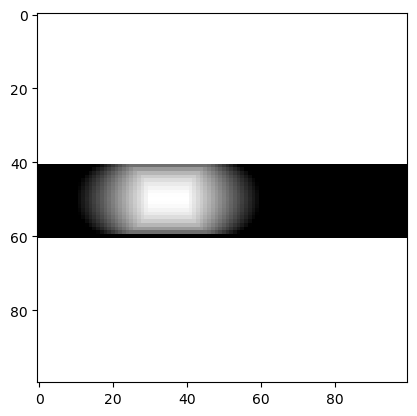

In [107]:
x,y,r,vx,vy,t = 0,0,1,1,0,3
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
interval = t_interval(x=X-x, y=Y-y, r=r, vx=vx, vy=vy, te=t)
plt.imshow(interval, cmap='gray', vmin=0 ) #vmax=1

In [11]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 

x = np.outer(np.linspace(-4, 4, 33), np.ones(33)) 
x
# y = x.copy().T
# z = (np.sin(x **2) + np.cos(y **2) ) 


# fig = plt.figure(figsize =(14, 9)) 
# ax = plt.axes(projection ='3d') 

# ax.plot_surface(x, y, z) 


# plt.show() 

array([[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
       [-3.75, -3.75, -3.75, ..., -3.75, -3.75, -3.75],
       [-3.5 , -3.5 , -3.5 , ..., -3.5 , -3.5 , -3.5 ],
       ...,
       [ 3.5 ,  3.5 ,  3.5 , ...,  3.5 ,  3.5 ,  3.5 ],
       [ 3.75,  3.75,  3.75, ...,  3.75,  3.75,  3.75],
       [ 4.  ,  4.  ,  4.  , ...,  4.  ,  4.  ,  4.  ]])

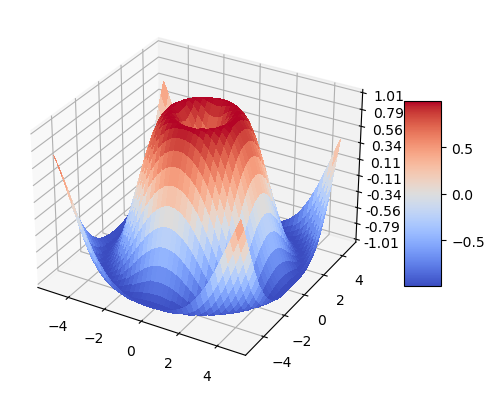

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [13]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])